<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Monte_Carlo_acierto_y_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from random import random
from statistics import stdev, mean
import numpy as np
import matplotlib.pyplot as plt

In [164]:
# Definimos la función a integrar
# En este caso, g(x) = sqrt(atan(x))
def g(x):
  return np.sqrt(np.atan(x))

# Función para contar los puntos que caen por debajo de la curva g(x)
def is_below(x, y):
  c = 0  # Contador de puntos debajo de la curva
  for i in range(len(x)):
    if y[i] <= g(x[i]):  # Si el punto y está por debajo de g(x), se cuenta
      c += 1
  return c

# Método de Monte Carlo de acierto y error para calcular la integral
def integral(a, b, N):
  """
  Estima la integral de g(x) en el intervalo [a, b] mediante el método de Monte Carlo.

  Parámetros:
  a, b: límites de integración
  N: número de puntos aleatorios generados

  Retorna:
  Aproximación de la integral definida de g(x) en [a, b]
  """
  x = np.linspace(a, b, 100)  # Puntos equiespaciados para estimar y_max, y_min
  y_max = np.max(g(x))  # Aproximación del valor máximo de g(x)
  y_min = np.min(g(x))  # Aproximación del valor mínimo de g(x)

  # Generamos N valores aleatorios de x en [a, b]
  x = [random() * (b - a) + a for _ in range(N)]
  # Generamos N valores aleatorios de y en [y_min, y_max]
  y = [random() * (y_max - y_min) + y_min for _ in range(N)]

  # Calculamos el área del rectángulo y multiplicamos por la proporción de puntos debajo de la curva
  return (b - a) * (y_max - y_min) * is_below(x, y) / N

# Función para graficar la función g(x) y los puntos aleatorios generados
def graph(a, b, N):
  x = np.linspace(a, b, 100)  # Valores de x para graficar g(x)
  plt.plot(x, g(x), "r", label="g(x)")  # Curva de la función
  y_max = np.max(g(x))  # Valor máximo de g(x)
  y_min = np.min(g(x))  # Valor mínimo de g(x)

  # Generamos N puntos aleatorios en el rectángulo [a, b] x [y_min, y_max]
  x = [random() * (b - a) + a for _ in range(N)]
  y = [random() * (y_max - y_min) + y_min for _ in range(N)]
  plt.scatter(x, y, s=500/N, label="Puntos aleatorios")  # Puntos generados
  plt.title("Gráfico de la integral")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.grid(True)
  plt.show()


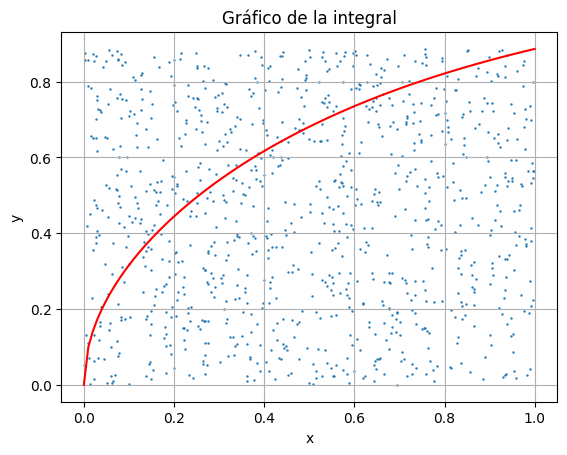

In [165]:
# Graficamos la función con los puntos generados
graph(0, 1, 1000)

In [209]:
# Calculamos la aproximación de la integral para diferentes números de muestras
x = []
for i in range(1, 1000):
  x.append(integral(0, 1, 100 * i))

# Se imprime el resultado final con la media y la desviación estándar
print(f"El valor aproximado de la integral es: {mean(x)}")
print(f"Con un error de ± {stdev(x)}")

El valor aprodimado de la función es: 0.6297764648975914
Con un error de +-0.0038702040047450914


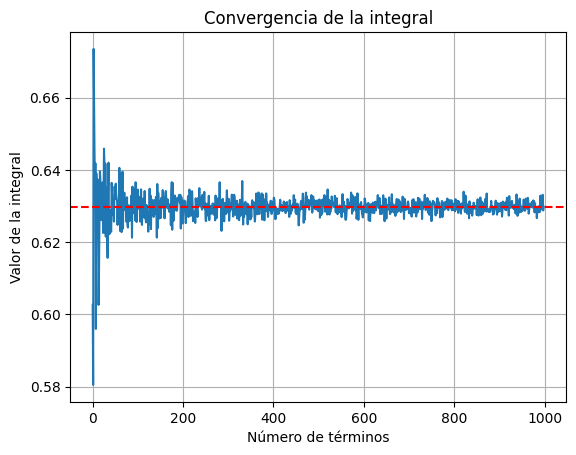

In [210]:
# Valor de referencia de la integral
x0 = 0.62982334

# Se grafica la convergencia de la integral con el número de términos
plt.plot(x, label="Aproximación Monte Carlo")
plt.title("Convergencia de la integral")
plt.axhline(y=x0, color="r", linestyle="--", label="Valor de referencia")
plt.xlabel("Número de términos")
plt.ylabel("Valor de la integral")
plt.legend()
plt.grid(True)
plt.show()